This project aims to predict the price of gold (represented by the Gold ETF, GLD) based on historical data. By leveraging machine learning techniques, we aim to develop a predictive model that can forecast gold prices with high accuracy. Accurate predictions of gold prices can provide valuable insights for investment strategies and risk management.
# Success Criteria:
The model should achieve a low MAE and RMSE.

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from  sklearn import metrics

# DATA COLLECTION :

In [6]:
df = pd.read_csv("C:/Users/hp/Downloads/gld_price_data.csv")
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [7]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [15]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


# DATA CLEANING :

In [9]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# EDA :

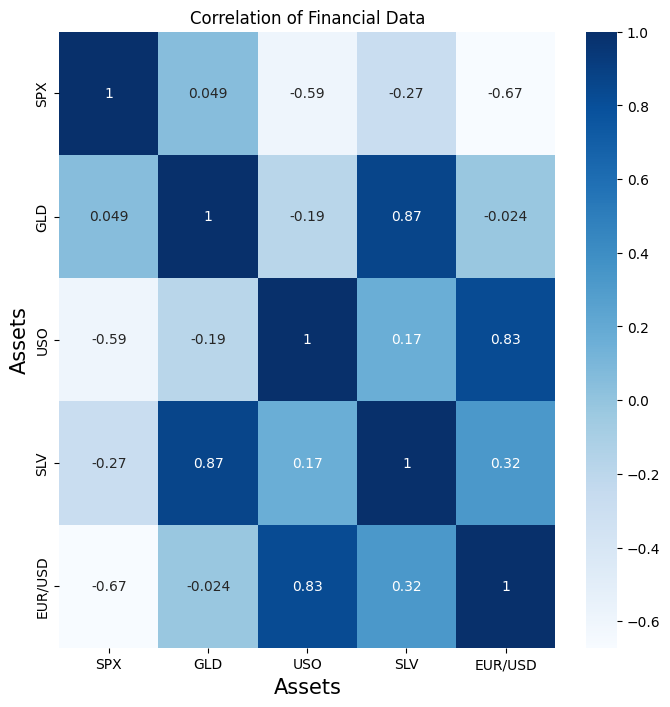

In [27]:
extract_data=df[['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(extract_data,cmap="Blues",annot=True)
plt.title('Correlation of Financial Data')
plt.xlabel('Assets',fontsize=15)
plt.ylabel('Assets',fontsize=15)
plt.show()

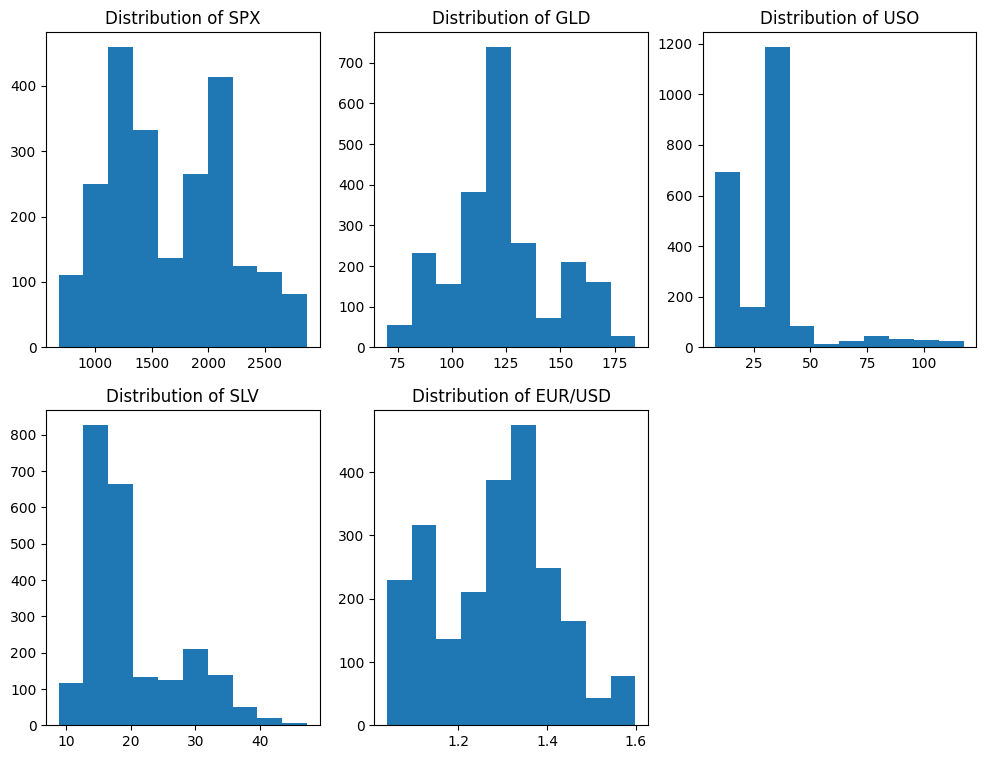

In [40]:
plt.figure(figsize=(12, 9))

plt.subplot(2,3,1)
plt.hist(df["SPX"])
plt.title("Distribution of SPX")

plt.subplot(2,3,2)
plt.hist(df["GLD"])
plt.title("Distribution of GLD")

plt.subplot(2,3,3)
plt.hist(df["USO"])
plt.title("Distribution of USO")

plt.subplot(2,3,4)
plt.hist(df["SLV"])
plt.title("Distribution of SLV")

plt.subplot(2,3,5)
plt.hist(df["EUR/USD"])
plt.title("Distribution of EUR/USD")

plt.show()

In [46]:
df[df['GLD'] == df['GLD'].max()]

,Date,SPX,GLD,USO,SLV,EUR/USD
795,8/22/2011,1123.819946,184.589996,32.720001,42.630001,1.436101


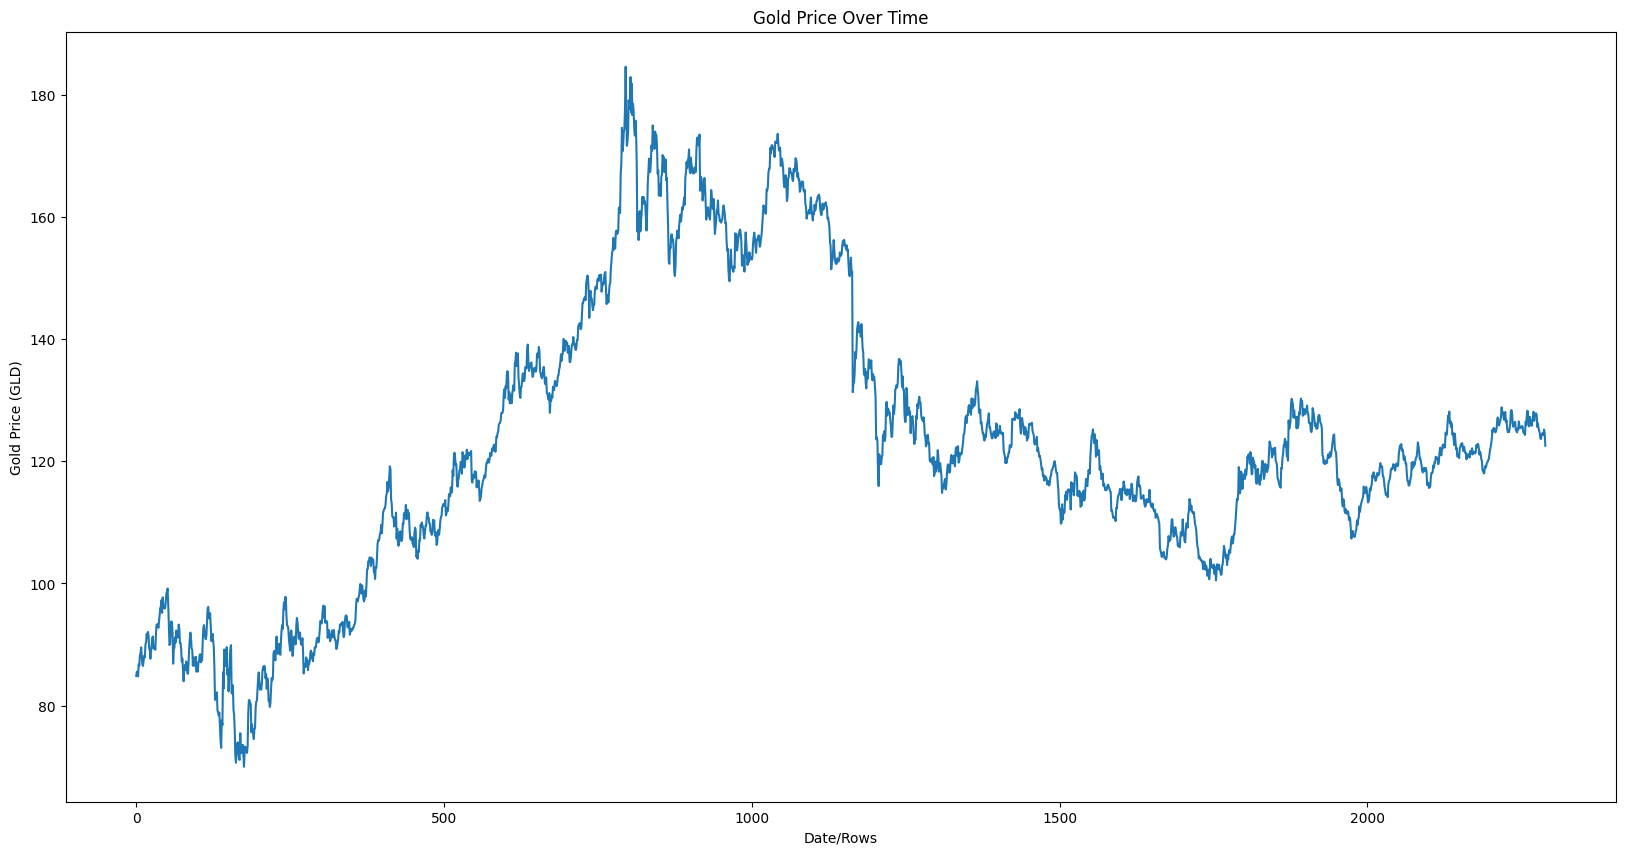

In [54]:
plt.figure(figsize=(20, 10))
plt.plot(df.index,df["GLD"])
plt.xlabel('Date/Rows')
plt.ylabel('Gold Price (GLD)')
plt.title('Gold Price Over Time')
plt.show()

# DATA SPLITTING :

In [58]:
X = df.drop(['Date','GLD'],axis=1)
y= df['GLD']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

Here,
Train-Test Split: Split the data into training (80%) and testing (20%) sets.
Training set: 1832 samples 
Testing set: 458 samples

Feature engineering is the process of creating new input features from existing data to improve the performance of machine learning models. It involves transforming raw data into a format that better represents the underlying problem to the predictive models, thereby enhancing their accuracy.

In [72]:
from sklearn.preprocessing import StandardScaler
normalize=StandardScaler()
normalize.fit_transform(X_train, y_train)

array([[-0.65187983,  0.30710381,  1.59075105,  0.1410159 ],
       [-0.85943297,  0.26196036,  1.12325055,  0.11462549],
       [-0.49316616,  3.44508592, -0.46510663,  2.00507768],
       ...,
       [ 0.63956305, -1.09686205, -0.94261478, -1.58071782],
       [-0.26330572,  0.13656147,  1.49782285,  0.41532627],
       [ 0.33289758,  0.19524805, -0.03048871,  0.56722815]])

In [73]:
normalize.fit_transform(X_train, y_train).shape

(1832, 4)

# LINEAR REGRESSION 

In [77]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [96]:
y_pred_lm=model.predict(X_test)
y_pred_lm

array([101.44816791, 120.28973108, 122.37263886, 122.79115704,
       166.97240816, 113.11380737, 111.35704844, 122.12288468,
       132.48740222,  89.53718441,  98.41670722, 158.60204966,
       118.48827817, 104.59387358, 139.48681741, 115.25105414,
       121.85080261, 112.64700295, 149.70240354, 120.89486867,
       122.19002061, 113.05163726,  95.60415811, 116.95453221,
       104.59957099,  97.06546728, 119.27515777, 151.01906044,
       106.15157455, 100.6671573 , 110.06195746,  95.73252572,
       123.68624916, 121.52991466, 121.09945956, 140.52169775,
       114.32186832, 103.16815774, 120.43344093, 116.5109465 ,
       148.10604315, 119.42440532, 117.82938219, 157.96951557,
       118.6724412 , 157.0136589 , 114.52058315,  99.15429833,
       114.32520781,  80.26650891, 112.86719882, 124.90913779,
       115.83627494, 140.36483033, 161.66326199, 111.9026538 ,
       105.6766117 , 122.3893524 , 109.30361051, 106.8597831 ,
       120.68608633, 151.18493781, 104.40249509, 111.89

In [101]:
model_score=metrics.r2_score(y_test, y_pred_lm)
model_squared_error=metrics.mean_squared_error(y_test, y_pred_lm)
model_absolute_error=metrics.mean_absolute_error(y_test, y_pred_lm)
print("R-squared on test set:",model_score)
print("Mean Squared Error on test set:",model_squared_error)
print("Mean Absolute Error on test set:",model_absolute_error)

R-squared on test set: 0.8635736059359729
Mean Squared Error on test set: 75.73536626500791
Mean Absolute Error on test set: 6.375129138001538


# DECISION TREE REGRESSION

In [100]:
model=DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred_tree=model.predict(X_test)
y_pred_tree

array([102.529999, 125.620003, 121.870003, 127.839996, 138.210007,
       116.330002, 106.379997, 127.910004, 141.919998,  93.529999,
        91.75    , 145.649994, 120.260002,  98.339996, 131.199997,
       113.470001, 129.860001, 105.699997, 159.429993, 125.720001,
       119.82    , 120.989998,  89.540001, 119.769997, 106.480003,
        91.75    , 116.739998, 161.889999,  99.339996,  93.849998,
       113.650002,  87.889999, 127.059998, 122.769997, 121.800003,
       152.160004, 110.760002, 109.470001, 120.099998, 114.      ,
       158.970001, 123.599998, 115.330002, 168.110001, 116.029999,
       168.110001, 111.309998,  93.25    , 105.720001,  85.970001,
       116.360001, 126.160004, 119.510002, 153.029999, 169.809998,
       101.919998, 107.099998, 122.230003, 112.300003, 110.82    ,
       122.959999, 159.699997,  96.5     , 117.400002, 168.610001,
       132.009995, 161.570007, 162.699997, 108.620003, 116.690002,
       132.800003, 107.309998, 122.040001, 119.290001, 102.610

In [103]:
model_score=metrics.r2_score(y_test, y_pred_tree)
model_squared_error=metrics.mean_squared_error(y_test, y_pred_tree)
model_absolute_error=metrics.mean_absolute_error(y_test, y_pred_tree)
print("R-squared on test set:",model_score)
print("Mean Squared Error on test set:",model_squared_error)
print("Mean Absolute Error on test set:",model_absolute_error)

R-squared on test set: 0.9849405624989706
Mean Squared Error on test set: 8.360053952244694
Mean Absolute Error on test set: 1.4121614999999998


# RANDOM FOREST 

In [106]:
model=RandomForestRegressor()
model.fit(X_train, y_train)
y_pred_forest=model.predict(X_test)
y_pred_forest

array([101.54239899, 126.01920126, 122.05100088, 126.80949829,
       144.44920068, 115.84690009, 108.14730081, 126.19430279,
       140.87669758,  93.37400012,  90.47250014, 146.44629888,
       120.18760133,  98.09259753, 131.734598  , 113.38409961,
       129.70879816, 105.40200077, 160.2038972 , 125.29609991,
       119.90040014, 120.95069877,  90.97440023, 119.36139902,
       107.54599935,  90.71349973, 119.68909978, 160.99770006,
       101.98490032,  96.45580207, 113.15370113,  88.15479968,
       127.03889983, 123.17119977, 122.09049946, 151.85939946,
       110.92119932, 108.94310096, 120.16250096, 114.72720062,
       158.9680015 , 120.77489946, 115.08280028, 167.67139897,
       116.4770002 , 164.29850176, 111.30899949,  92.7153997 ,
       107.13520065,  85.97049982, 116.91929931, 126.28129932,
       121.60330157, 152.82440032, 170.32400008, 101.94889905,
       105.02509967, 122.81639921, 113.28480207, 110.12249862,
       121.89620048, 159.8132992 ,  96.92609966, 117.44

In [107]:
model_score=metrics.r2_score(y_test, y_pred_forest)
model_squared_error=metrics.mean_squared_error(y_test, y_pred_forest)
model_absolute_error=metrics.mean_absolute_error(y_test, y_pred_forest)
print("R-squared on test set:",model_score)
print("Mean Squared Error on test set:",model_squared_error)
print("Mean Absolute Error on test set:",model_absolute_error)

R-squared on test set: 0.9933762035235744
Mean Squared Error on test set: 3.677115822408461
Mean Absolute Error on test set: 1.11948193379913


# CONCLUSION :
The project's primary goal was to forecast the price of gold using historical data from the Gold ETF (GLD). Employing machine learning techniques, our focus was on constructing a reliable predictive model. After comprehensive evaluation, the Random Forest algorithm emerged as the optimal choice, delivering precise predictions crucial for guiding investment strategies and improving risk management protocols.

# KEY INSIGHTS:
From the EDA, several significant trends and patterns were identified:

1) A strong correlation was found between gold prices (GLD) and silver prices (SLV), indicating that changes in silver prices often mirrored changes in gold prices.
2) Oil prices and the EUR/USD exchange rate may be influenced by similar economic factors. 
3) The time series analysis revealed seasonal trends and periodic fluctuations in gold prices, influenced by market conditions and geopolitical events.
4) Historical trends in gold prices identify periods of volatility, and possibly correlate these trends with economic events or market conditions during those times. Investors might use this information to make decisions about buying or selling gold based on historical price patterns and market conditions.